In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from scipy import *
import numpy as np
import requests
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


## Coappearance network of characters in Les Miserables

This notebook uses some basic `networkx` functions to analyse the coappearance network of characters in Les Miserables. I believe the original `gml` file comes from [Mark Newman](http://www-personal.umich.edu/~mejn/netdata/).

Here we just plot the `gml` file, but it's a bit messy. 

In [4]:
G = nx.read_gml('lesmiserables.gml', relabel=True)

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.0000000000000002)

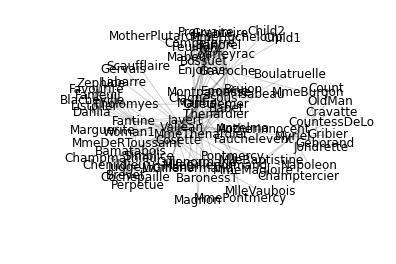

In [98]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha = 0.2);
nx.draw_networkx_labels(G, pos);
plt.axis('off')

## Distribution of the degree

A good majority of the characters co-appear with only a few other characters.

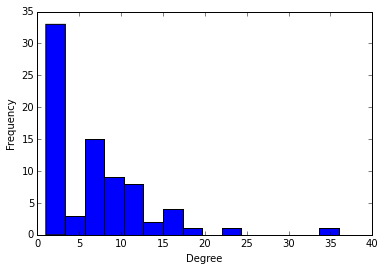

In [9]:
d = nx.degree(G)
plt.hist(d.values(), bins =15);
plt.xlabel('Degree')
plt.ylabel('Frequency')

## Displaying only some nodes

Here we only want to select the most highly connected nodes. To do this, I iterate across all the characters in the story and calculate the number of neighbours for each character.

As a bonus I have set the edge thickness to be proportional to the number of edges possessed by each node. 

In [21]:
characters = nx.nodes(G)

In [22]:
characters[:5]

[u'MlleBaptistine', u'MlleVaubois', u'Javert', u'Champtercier', u'Child1']

In [24]:
neighbors_full = nx.neighbors(G,'Valjean')
print len(neighbors_full)

36


In [30]:
# Create a list of the connectivity
char_neigh = []
for char in characters:
    char_neigh.append(len(nx.neighbors(G, 
                        str(char))))

In [32]:
char_neigh[:5]

[3, 1, 17, 1, 2]

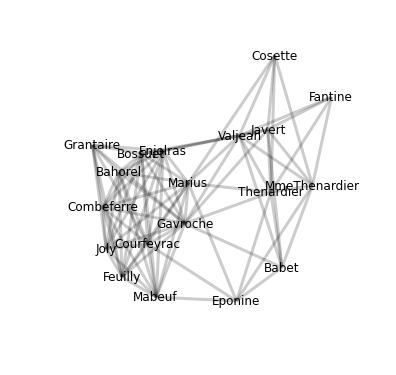

In [94]:
# Only select characters with a connectivity > 10
Gc = G.copy()
for char in nx.nodes(Gc):
    if len(nx.neighbors(Gc, str(char))) < 10:
        Gc.remove_node(char)

# Calculate the edge width based on connectivity
edgewidth=[]
for (u,v,d) in Gc.edges(data=True):
    edgewidth.append(len(Gc.get_edge_data(u,v))*3)
        
# Now draw it
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 15
pos = nx.spring_layout(Gc)
nx.draw_networkx_nodes(Gc, pos, node_size=0);
nx.draw_networkx_labels(Gc, pos);
nx.draw_networkx_edges(Gc,pos, width=edgewidth, alpha =0.2)
plt.axis('off');

## Degree-rank graph

This last graph plots the degree-rank relation. It is available from the Networkx website, I think. 

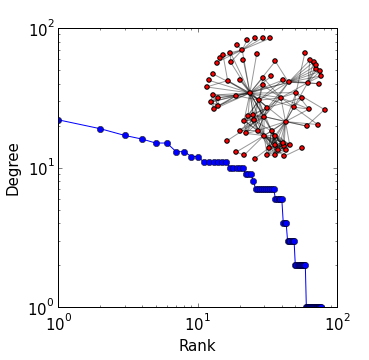

In [69]:
# Sequence of connectivity
degree_sequence = sorted(nx.degree(G).values(), reverse=True)
dmax = max(degree_sequence)
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
plt.loglog(degree_sequence, 'b-', marker='o')
plt.ylabel('Degree')
plt.xlabel('Rank')

# Draw the connectivity graph in inset
plt.axes([0.47, 0.47, 0.47, 0.47])
Gcc = sorted(nx.connected_component_subgraphs(G),
            key = len, reverse=True)[0]
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)